In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [77]:
def generate_train_val_splits(direction):
    steerings = pd.read_csv("./Ch2/{}.csv".format(direction), dtype={'angle': np.double, 
                                                                     'torque': np.double, 
                                                                     'speed': np.double})
    x = [0]
    prev_ts = 0
    index = 0
    data_slices = []
    for row in steerings.iterrows():
        current_ts = int(row[1]["timestamp"]/1e6)
        delta = current_ts-prev_ts
        prev_ts = current_ts
        if delta > 60:
            #print index, x[-1]
            data_slices.append(steerings[x[-1]:index].reset_index())
            x.append(index)
        index += 1
    data_slices.append(steerings[x[-1]:index].reset_index())
    
    for ix,d in enumerate(data_slices[1:]):
        l = len(d)
        tr = int(0.9*l)
        print "Writing sets for driver{} to data/train_{}_{} and data/val_{}_{}".format(ix, direction, ix, direction, ix)
        del d['level_0']
        d[:tr].reset_index().to_csv("data/train_{}_{}.csv".format(direction, ix), index=False, 
                                    header=True, columns=('index', 'timestamp', 'filename', 
                                                                       'angle', 'torque', 'speed'))
        d[tr:].reset_index().to_csv("data/val_{}_{}.csv".format(direction, ix), index=False, 
                                    header=True, columns=('index', 'timestamp', 'filename', 
                                                                       'angle', 'torque', 'speed'))    

In [78]:
generate_train_val_splits('center')

Writing sets for driver0 to data/train_center_0 and data/val_center_0
Writing sets for driver1 to data/train_center_1 and data/val_center_1
Writing sets for driver2 to data/train_center_2 and data/val_center_2
Writing sets for driver3 to data/train_center_3 and data/val_center_3
Writing sets for driver4 to data/train_center_4 and data/val_center_4


In [79]:
generate_train_val_splits('left')

Writing sets for driver0 to data/train_left_0 and data/val_left_0
Writing sets for driver1 to data/train_left_1 and data/val_left_1
Writing sets for driver2 to data/train_left_2 and data/val_left_2
Writing sets for driver3 to data/train_left_3 and data/val_left_3
Writing sets for driver4 to data/train_left_4 and data/val_left_4


In [80]:
generate_train_val_splits('right')

Writing sets for driver0 to data/train_right_0 and data/val_right_0
Writing sets for driver1 to data/train_right_1 and data/val_right_1
Writing sets for driver2 to data/train_right_2 and data/val_right_2
Writing sets for driver3 to data/train_right_3 and data/val_right_3
Writing sets for driver4 to data/train_right_4 and data/val_right_4
Writing sets for driver5 to data/train_right_5 and data/val_right_5


##### Exploring some data

In [95]:
df = pd.read_csv("data/train_center_1.csv")

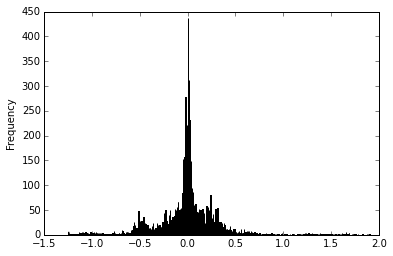

In [96]:
df['angle'].plot('hist', bins=1000)

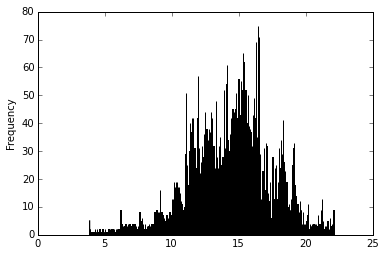

In [89]:
df['speed'].plot('hist', bins=1000)

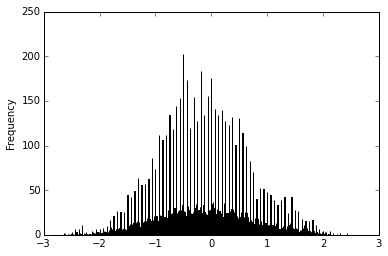

In [92]:
df['torque'].plot('hist', bins=1000)